In [1]:
import pandas as pd

# 311 data

In [2]:
df_311 = pd.read_csv('311_power_outage_complaints.csv')
df_311.columns = df_311.columns.str.replace(" ","_")
df_311.dtypes

Unique_Key                          int64
Created_Date                       object
Closed_Date                        object
Agency                             object
Agency_Name                        object
Complaint_Type                     object
Descriptor                         object
Location_Type                      object
Incident_Zip                      float64
Incident_Address                   object
Street_Name                        object
Cross_Street_1                     object
Cross_Street_2                     object
Intersection_Street_1             float64
Intersection_Street_2             float64
Address_Type                       object
City                               object
Landmark                          float64
Facility_Type                     float64
Status                             object
Due_Date                          float64
Resolution_Action_Updated_Date     object
Community_Board                    object
Borough                           

## Looking at 10469 zip specifically

In [3]:
df_311['Incident_Datetime'] = pd.to_datetime(df_311.Created_Date)
df_311 = df_311[df_311.Incident_Datetime > '2020-10-03']


In [4]:
df_311[df_311['Incident_Zip'] == 10469]
df_311.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'Vehicle_Type',
       'Taxi_Company_Borough', 'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Latitude', 'Longitude', 'Location', 'Incident_Datetime'],
      dtype='object')

<AxesSubplot: title={'center': '311 Complaints in Zipcode 10469'}, xlabel='Incident_Datetime'>

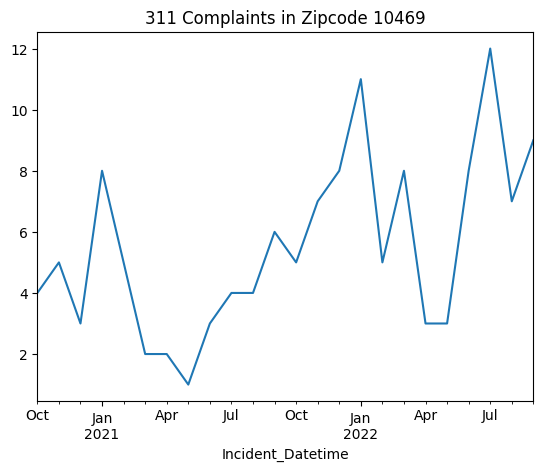

In [5]:
df_311[df_311['Incident_Zip'] == 10469].\
resample('M', on='Incident_Datetime').Unique_Key.count()\
.plot(title = '311 Complaints in Zipcode 10469')


In [6]:
df_out = pd.read_csv('cleaned_df.csv')
df_out.head()

,Unnamed: 0,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,...,Problem,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,new_time_crawled,length,length_minutes
0,0,10 WEST ST,51:57.0,10004,40.705548,-74.017662,10,West Street,NaN,Manhattan,...,Building Outage,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658919118,2022-08-29T20:33:22.000Z,2022-07-27T10:51:58.000Z,33 days 09:41:24,48101.400000
1,1,106 ASPINWALL ST,55:36.0,10307,40.505322,-74.248814,106,Aspinwall Street,Tottenville,Staten Island,...,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z,43 days 00:37:53,61957.883333
2,2,107 ASPINWALL ST,55:36.0,10307,40.505372,-74.248281,107,Aspinwall Street,Tottenville,Staten Island,...,No Lights,Crews will be dispatched soon. We'll provide a...,We'll provide details when we complete the inv...,1,2022-07-17T04:00:00.000Z,1658087737,2022-08-29T20:33:30.000Z,2022-07-17T19:55:37.000Z,43 days 00:37:53,61957.883333
3,3,101 WEST ST,12:34.0,10014,40.711038,-74.014770,101,West Street,NaN,Manhattan,...,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920354,2022-08-29T20:33:23.000Z,2022-07-27T11:12:34.000Z,33 days 09:20:49,48080.816667
4,4,105 WEST ST,12:41.0,10014,40.729286,-74.010547,105,West Street,NaN,Manhattan,...,Partial Outage,Crews have been dispatched and should arrive s...,We'll provide details when we complete the inv...,1,2022-07-27T04:00:00.000Z,1658920361,2022-08-29T20:33:29.000Z,2022-07-27T11:12:41.000Z,33 days 09:20:48,48080.800000


In [7]:
df_out.dtypes

Unnamed: 0                 int64
GoogleMapsAddress         object
TimeCrawled               object
PostalCode                 int64
Latitude                 float64
Longitude                float64
StreetNumber              object
StreetAddress             object
Neighborhood              object
Borough                   object
County                    object
State                     object
PostalSuffix             float64
CurrentOverallRanking    float64
PlaceID                   object
OutageCustomers            int64
Problem                   object
CrewStatus                object
Cause                     object
UniqueID                  object
DateCrawled               object
TimeStampCrawled           int64
DateFixed                 object
new_time_crawled          object
length                    object
length_minutes           float64
dtype: object

In [8]:
df_out['Outage_Datetime'] = pd.to_datetime(df_out['new_time_crawled'])
df_out.dtypes

Unnamed: 0                             int64
GoogleMapsAddress                     object
TimeCrawled                           object
PostalCode                             int64
Latitude                             float64
Longitude                            float64
StreetNumber                          object
StreetAddress                         object
Neighborhood                          object
Borough                               object
County                                object
State                                 object
PostalSuffix                         float64
CurrentOverallRanking                float64
PlaceID                               object
OutageCustomers                        int64
Problem                               object
CrewStatus                            object
Cause                                 object
UniqueID                              object
DateCrawled                           object
TimeStampCrawled                       int64
DateFixed 

In [9]:
df_out.head()
df_out.sort_values(by='Outage_Datetime', ascending=True)
df_out[df_out['PostalCode'] == 10469].head()

,Unnamed: 0,GoogleMapsAddress,TimeCrawled,PostalCode,Latitude,Longitude,StreetNumber,StreetAddress,Neighborhood,Borough,...,CrewStatus,Cause,UniqueID,DateCrawled,TimeStampCrawled,DateFixed,new_time_crawled,length,length_minutes,Outage_Datetime
2637,2637,1003 ALLERTON AV,25:02.0,10469,40.865714,-73.858424,1003,Allerton Avenue,Laconia,The Bronx,...,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-24T04:00:00.000Z,1658705103,2022-08-29T20:33:22.000Z,2022-07-24T23:25:03.000Z,35 days 21:08:19,51668.316667,2022-07-24 23:25:03+00:00
2638,2638,1006 ALLERTON AV,25:05.0,10469,40.865220,-73.858440,1006,Allerton Avenue,Laconia,The Bronx,...,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-24T04:00:00.000Z,1658705105,2022-08-29T20:33:22.000Z,2022-07-24T23:25:05.000Z,35 days 21:08:17,51668.283333,2022-07-24 23:25:05+00:00
2639,2639,1007 ALLERTON AV,25:01.0,10469,40.865690,-73.858364,1007,Allerton Avenue,Laconia,The Bronx,...,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-24T04:00:00.000Z,1658705101,2022-08-29T20:33:22.000Z,2022-07-24T23:25:01.000Z,35 days 21:08:21,51668.350000,2022-07-24 23:25:01+00:00
2640,2640,1009 ALLERTON AV,25:08.0,10469,40.865692,-73.858252,1009,Allerton Avenue,Laconia,The Bronx,...,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-24T04:00:00.000Z,1658705109,2022-08-29T20:33:23.000Z,2022-07-24T23:25:09.000Z,35 days 21:08:14,51668.233333,2022-07-24 23:25:09+00:00
2641,2641,1011 ALLERTON AV,25:06.0,10469,40.865746,-73.858116,1011,Allerton Avenue,Laconia,The Bronx,...,An outage has recently been reported in your a...,We'll provide details when we complete the inv...,1,2022-07-24T04:00:00.000Z,1658705106,2022-08-29T20:33:23.000Z,2022-07-24T23:25:06.000Z,35 days 21:08:17,51668.283333,2022-07-24 23:25:06+00:00


<AxesSubplot: title={'center': 'Con Ed Records Outage in Zipcode 10469'}, xlabel='Outage_Datetime'>

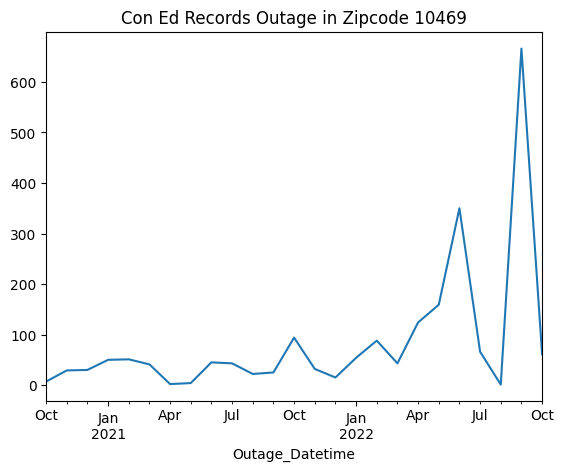

In [10]:
df_out[(df_out['PostalCode'] == 10469)].\
resample('M', on='Outage_Datetime').TimeStampCrawled.count().plot(title = 'Con Ed Records Outage in Zipcode 10469')

<AxesSubplot: xlabel='Outage_Datetime'>

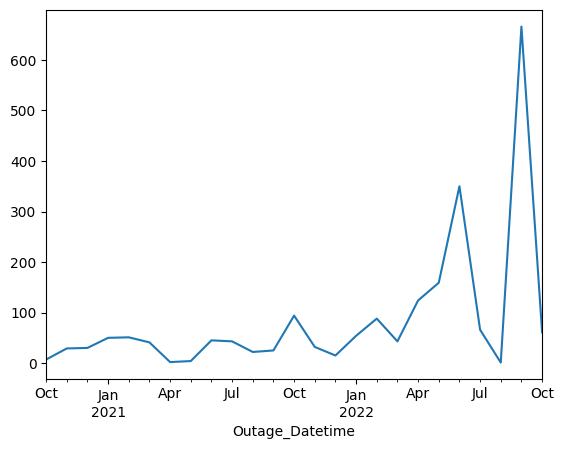

In [11]:
df_out[(df_out['PostalCode'] == 10469)&(df_out.Outage_Datetime > '2020')].\
resample('M', on='Outage_Datetime').TimeStampCrawled.count()\
.plot()

## Looking at zipcode 10466

<AxesSubplot: xlabel='Incident_Datetime'>

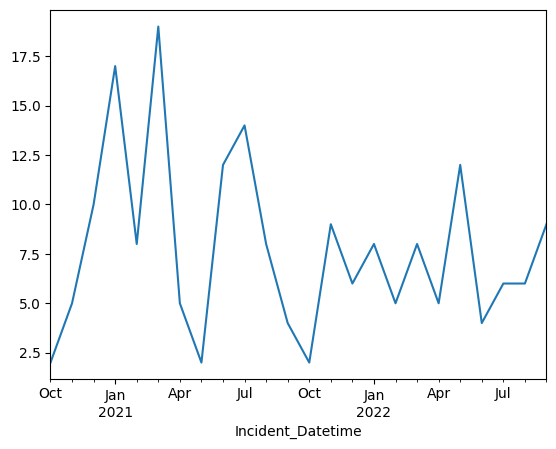

In [12]:
ax1 = df_311[(df_311['Incident_Zip'] == 10466)&(df_311.Incident_Datetime > '2020-10')].\
resample('M', on='Incident_Datetime').Unique_Key.count()\
.plot()
ax1

<AxesSubplot: title={'center': 'Con Ed Records Outage in Zipcode 10466'}, xlabel='Outage_Datetime'>

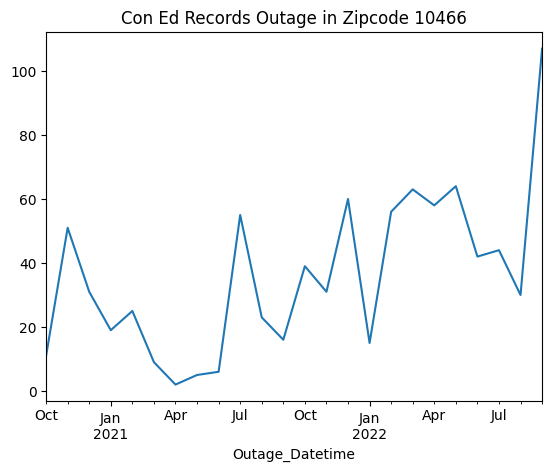

In [13]:
df_out[(df_out['PostalCode'] == 10466)&(df_out.Outage_Datetime < '2022-10')].\
resample('M', on='Outage_Datetime').TimeStampCrawled.count()\
.plot(title = 'Con Ed Records Outage in Zipcode 10466')

In [14]:
df_count = pd.DataFrame(df_311['Incident_Zip'].value_counts()).reset_index()
df_count

,index,Incident_Zip
0,11226.0,376
1,10458.0,341
2,10457.0,315
3,10467.0,295
4,11207.0,291
...,...,...
170,11001.0,4
171,11360.0,4
172,11040.0,3
173,10118.0,2


In [15]:
df_zip = pd.read_csv('df_nyc_zip.csv')
df_zip

,Unnamed: 0,Zipcode,Estimate,Margin of Error,Lower Estimate,Upper Estimate
0,0,10001,25026,1759,23267,26785
1,1,10002,74363,3183,71180,77546
2,2,10003,54671,2568,52103,57239
3,3,10004,3310,658,2652,3968
4,4,10005,8664,906,7758,9570
...,...,...,...,...,...,...
209,209,11691,68454,3192,65262,71646
210,210,11692,22394,1856,20538,24250
211,211,11693,13029,1251,11778,14280
212,212,11694,21258,1683,19575,22941


In [16]:
merged = df_311.merge(df_zip, left_on = 'Incident_Zip', right_on='Zipcode')
merged.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Latitude,Longitude,Location,Incident_Datetime,Unnamed: 0,Zipcode,Estimate,Margin of Error,Lower Estimate,Upper Estimate
0,54499345,6/15/22 11:10,6/24/22 15:21,HPD,Department of Housing Preservation and Develop...,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,10456.0,1208 COLLEGE AVENUE,...,40.833026,-73.913218,"(40.83302598583836, -73.91321787771672)",2022-06-15 11:10:00,87,10456,90479,3785,86694,94264
1,54518707,6/17/22 10:26,6/24/22 13:59,HPD,Department of Housing Preservation and Develop...,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,10456.0,1341 FRANKLIN AVENUE,...,40.833757,-73.900504,"(40.83375679086547, -73.90050391251386)",2022-06-17 10:26:00,87,10456,90479,3785,86694,94264
2,48357829,12/8/20 18:01,4/12/21 10:19,HPD,Department of Housing Preservation and Develop...,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,10456.0,1307 FINDLAY AVENUE,...,40.835316,-73.910862,"(40.83531602464386, -73.91086231409062)",2020-12-08 18:01:00,87,10456,90479,3785,86694,94264
3,50042414,3/17/21 13:33,4/5/21 9:07,HPD,Department of Housing Preservation and Develop...,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,10456.0,274 BONNER PLACE,...,40.827610,-73.916585,"(40.82761040399497, -73.91658537520462)",2021-03-17 13:33:00,87,10456,90479,3785,86694,94264
4,53214407,1/30/22 7:21,2/9/22 16:07,HPD,Department of Housing Preservation and Develop...,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,10456.0,1055 SHERMAN AVENUE,...,40.830414,-73.917883,"(40.83041368929562, -73.91788272884429)",2022-01-30 07:21:00,87,10456,90479,3785,86694,94264


In [17]:
merged = merged[['Unique_Key', 'Zipcode','Created_Date', 'Closed_Date', 'Location_Type'\
                 , 'Estimate', 'Latitude','Longitude']]
merged



,Unique_Key,Zipcode,Created_Date,Closed_Date,Location_Type,Estimate,Latitude,Longitude
0,54499345,10456,6/15/22 11:10,6/24/22 15:21,RESIDENTIAL BUILDING,90479,40.833026,-73.913218
1,54518707,10456,6/17/22 10:26,6/24/22 13:59,RESIDENTIAL BUILDING,90479,40.833757,-73.900504
2,48357829,10456,12/8/20 18:01,4/12/21 10:19,RESIDENTIAL BUILDING,90479,40.835316,-73.910862
3,50042414,10456,3/17/21 13:33,4/5/21 9:07,RESIDENTIAL BUILDING,90479,40.827610,-73.916585
4,53214407,10456,1/30/22 7:21,2/9/22 16:07,RESIDENTIAL BUILDING,90479,40.830414,-73.917883
...,...,...,...,...,...,...,...,...
12736,54379409,10309,6/4/22 15:19,6/9/22 10:35,RESIDENTIAL BUILDING,33896,40.529445,-74.219486
12737,52508973,10309,11/13/21 17:27,11/16/21 17:33,RESIDENTIAL BUILDING,33896,40.536166,-74.222512
12738,53189205,10309,1/27/22 6:27,1/29/22 12:46,RESIDENTIAL BUILDING,33896,40.523470,-74.228912
12739,54224012,10007,5/19/22 11:59,5/26/22 12:49,RESIDENTIAL BUILDING,7566,40.715951,-74.011915


In [18]:
merged.Zipcode.value_counts().to_frame()

,Zipcode
11226,376
10458,341
10457,315
10467,295
11207,291
...,...
11362,5
11001,4
11360,4
11040,3


In [19]:
df_311 = df_311[['Created_Date','Incident_Zip','Borough']]

df_311['date']= pd.to_datetime(df_311['Created_Date']).dt.date


df_311.head()
grouped_311 = df_311.groupby(['Incident_Zip','Borough','date']).count().reset_index()
grouped_311
grouped_311.rename(columns = {'Created_Date':'Complaint'}, inplace = True)
grouped_311

,Incident_Zip,Borough,date,Complaint
0,10001.0,MANHATTAN,2021-01-20,2
1,10001.0,MANHATTAN,2021-04-02,1
2,10001.0,MANHATTAN,2021-08-29,1
3,10001.0,MANHATTAN,2021-09-15,2
4,10001.0,MANHATTAN,2021-09-27,1
...,...,...,...,...
9900,11694.0,QUEENS,2022-08-18,1
9901,11694.0,QUEENS,2022-09-08,1
9902,11694.0,QUEENS,2022-09-09,2
9903,11694.0,QUEENS,2022-09-11,1


In [20]:
df_311.dtypes

Created_Date     object
Incident_Zip    float64
Borough          object
date             object
dtype: object

In [21]:
df_out['Outage_Datetime'] = pd.to_datetime(df_out.Outage_Datetime).dt.date
df_out.dtypes

Unnamed: 0                 int64
GoogleMapsAddress         object
TimeCrawled               object
PostalCode                 int64
Latitude                 float64
Longitude                float64
StreetNumber              object
StreetAddress             object
Neighborhood              object
Borough                   object
County                    object
State                     object
PostalSuffix             float64
CurrentOverallRanking    float64
PlaceID                   object
OutageCustomers            int64
Problem                   object
CrewStatus                object
Cause                     object
UniqueID                  object
DateCrawled               object
TimeStampCrawled           int64
DateFixed                 object
new_time_crawled          object
length                    object
length_minutes           float64
Outage_Datetime           object
dtype: object

In [22]:
df_out = df_out[['PostalCode','Outage_Datetime','Borough']]

df_out['Outage'] = 1
df_out.head()

,PostalCode,Outage_Datetime,Borough,Outage
0,10004,2022-07-27,Manhattan,1
1,10307,2022-07-17,Staten Island,1
2,10307,2022-07-17,Staten Island,1
3,10014,2022-07-27,Manhattan,1
4,10014,2022-07-27,Manhattan,1


In [23]:
grouped_out = df_out.groupby(['PostalCode','Borough','Outage_Datetime']).count().reset_index()
grouped_out

,PostalCode,Borough,Outage_Datetime,Outage
0,10001,Manhattan,2020-10-23,1
1,10001,Manhattan,2020-11-16,1
2,10001,Manhattan,2020-11-23,1
3,10001,Manhattan,2020-11-25,1
4,10001,Manhattan,2020-11-30,3
...,...,...,...,...
24998,14551,New York's 24th Congressional District,2022-01-27,1
24999,14551,New York's 24th Congressional District,2022-01-28,1
25000,14551,New York's 24th Congressional District,2022-02-04,1
25001,14551,New York's 24th Congressional District,2022-02-10,1


In [24]:
merged = grouped_311.merge(grouped_out, how = 'outer', left_on = ['Incident_Zip','date'], right_on = ['PostalCode','Outage_Datetime'])
merged['Date'] = merged['date'].fillna(merged['Outage_Datetime'])
merged['Zip'] = merged['Incident_Zip'].fillna(merged['PostalCode'])
merged.dtypes
merged = merged[['Date','Zip','Borough_x','Outage','Complaint']]

In [25]:
merged.dtypes

Date          object
Zip          float64
Borough_x     object
Outage       float64
Complaint    float64
dtype: object

In [26]:
## Graph things up

In [27]:
import altair as alt
import numpy as np

In [28]:
merged['Zip'] = merged['Zip'].astype('category')
merged.sample(10)

,Date,Zip,Borough_x,Outage,Complaint
4258,2022-03-05,10470.0,BRONX,NaN,1.0
30945,2021-02-11,11428.0,NaN,3.0,NaN
21718,2021-07-26,11223.0,NaN,3.0,NaN
4106,2022-08-22,10468.0,BRONX,NaN,1.0
8431,2022-03-20,11365.0,QUEENS,NaN,1.0
23755,2022-10-16,11236.0,NaN,38.0,NaN
19392,2021-03-17,11209.0,NaN,1.0,NaN
31259,2022-09-13,11429.0,NaN,1.0,NaN
31149,2021-07-17,11429.0,NaN,3.0,NaN
19865,2021-08-29,11212.0,NaN,1.0,NaN


In [30]:
merged = merged.drop(columns = 'Borough_x')
merged.head()

,Date,Zip,Outage,Complaint
0,2021-01-20,10001.0,NaN,2.0
1,2021-04-02,10001.0,NaN,1.0
2,2021-08-29,10001.0,NaN,1.0
3,2021-09-15,10001.0,2.0,2.0
4,2021-09-27,10001.0,NaN,1.0


In [34]:
merged["Date"] = pd.to_datetime(merged["Date"])

In [35]:
long_merged = merged.melt(id_vars = ['Date','Zip']).query('value.notnull()')
long_merged

,Date,Zip,variable,value
3,2021-09-15,10001.0,Outage,2.0
16,2021-02-11,10002.0,Outage,8.0
17,2021-02-12,10002.0,Outage,2.0
27,2021-08-12,10002.0,Outage,7.0
28,2021-08-13,10002.0,Outage,1.0
...,...,...,...,...
42421,2022-08-18,11694.0,Complaint,1.0
42422,2022-09-08,11694.0,Complaint,1.0
42423,2022-09-09,11694.0,Complaint,2.0
42424,2022-09-11,11694.0,Complaint,1.0


In [36]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
# source = merged

# line1 = alt.Chart(source).mark_line().encode(
#     x='Date', 
#     y='Outage', 
#     color= alt.value('gold')
# )

# line2 = alt.Chart(source).mark_line().encode(
#     x='Date', 
#     y=alt.Y('Complaint', title='frequency'), 
#     color= alt.value('red')
# )

# combined = alt.layer(line1, line2, data = merged).facet('cluster', columns=2)
# combined.display()


In [39]:
source = long_merged

long_chart = alt.Chart(source).mark_line().encode(
  x='Date:T',
  y='value:Q',
  color='variable:N'
)



In [40]:
long_chart.facet(
    'Zip:N',
    columns=2).resolve_scale(
    y='independent'
)

alt.FacetChart(...)

In [ ]:


# base = alt.Chart(source).encode(x='Date')

# chart = alt.layer(
#     base.mark_line(color='blue').encode(y='Outage'),
#     base.mark_line(color='red').encode(y='Complaint')
# )
# chart

In [ ]:
# chart.facet(
#     'Zip:N',
#     columns=2).resolve_scale(
#     y='independent'
# )